# Digit Recognizer
Bu projede el yazısı rakamları tanıyan bir model geliştiriyoruz. Model verileri Kaggle yarışmalarından biri olan Digit Recognizer'den elde edilmiş ve kod yazımı için Kaggle ortamı kullanılmıştır. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

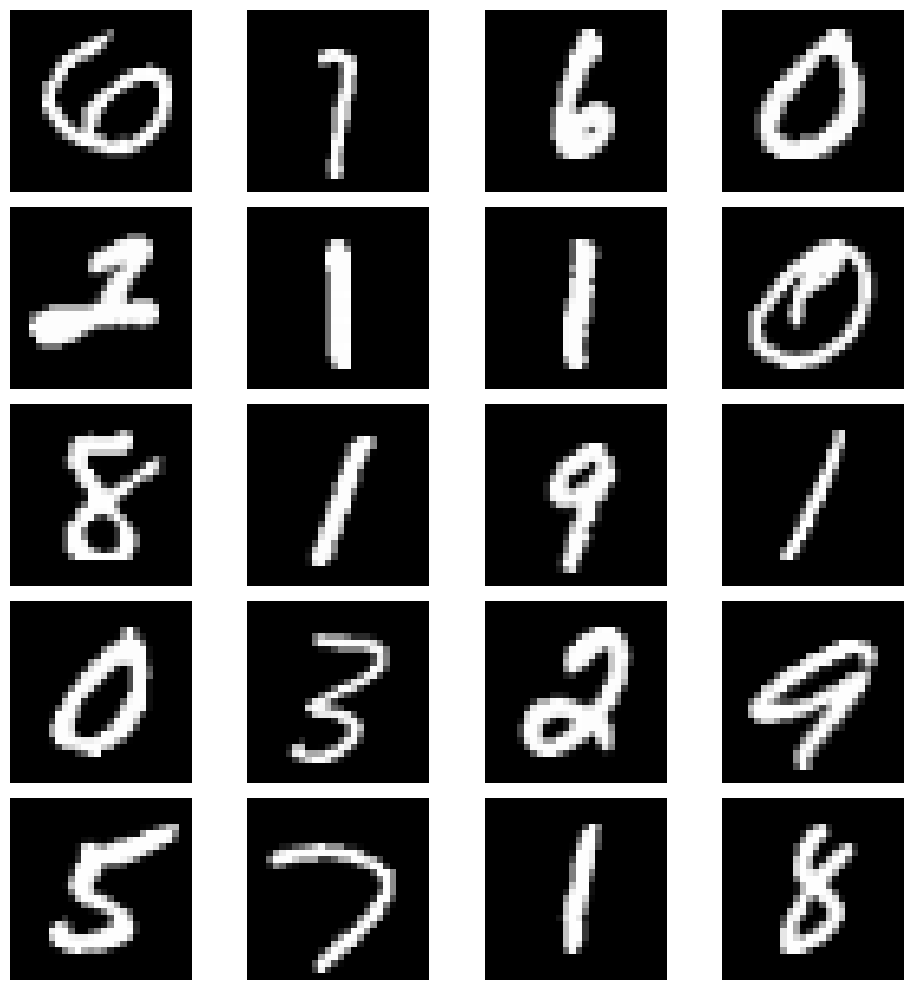

In [5]:
selected_images = df.sample(20)
selected_images = selected_images.reset_index(drop=True)

fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.axis("off")

plt.tight_layout()
plt.show()

## Modelleme

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df.drop("label", axis=1)
y=df[["label"]]
x.shape, y.shape

((42000, 784), (42000, 1))

In [8]:
from keras.utils import to_categorical

x = x / 255.0
y = to_categorical(y)

2024-05-09 17:40:33.041638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 17:40:33.041756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 17:40:33.168223: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape, y_train.shape

((33600, 784), (33600, 10))

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=25, verbose=1)

Epoch 1/25
  85/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5906 - loss: 1.3454

I0000 00:00:1715276446.818624      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8598 - loss: 0.4709 - val_accuracy: 0.9550 - val_loss: 0.1433
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9668 - loss: 0.1038 - val_accuracy: 0.9624 - val_loss: 0.1218
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9782 - loss: 0.0673 - val_accuracy: 0.9693 - val_loss: 0.1082
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9689 - val_loss: 0.1119
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9740 - val_loss: 0.0928
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9899 - loss: 0.0305 - val_accuracy: 0.9756 - val_loss: 0.0945
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9718 - val_loss: 0.1120
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accurac

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9791 - loss: 0.1594


(0.15005378425121307, 0.9789285659790039)

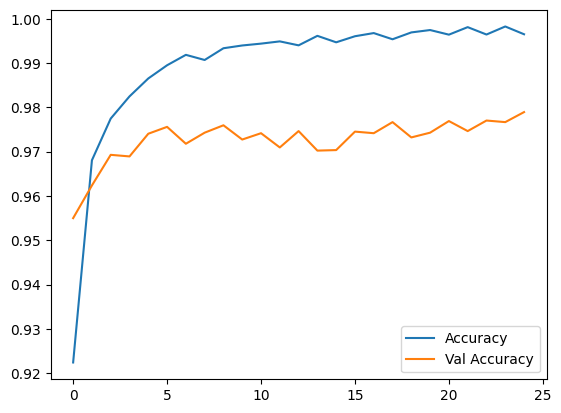

In [14]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [15]:
pred = model.predict(x_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
np.round(pred), y_test

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))

In [17]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(np.round(pred), axis=1))

array([[810,   0,   0,   0,   0,   0,   3,   2,   0,   1],
       [  0, 904,   1,   0,   0,   0,   1,   1,   2,   0],
       [  9,   6, 808,   1,   9,   0,   0,   4,   7,   2],
       [  3,   1,   2, 906,   0,   8,   0,   3,   8,   6],
       [  3,   0,   0,   0, 817,   0,   5,   2,   3,   9],
       [  0,   0,   0,   8,   1, 682,   5,   0,   1,   5],
       [  4,   1,   1,   0,   1,   1, 775,   0,   2,   0],
       [  1,   2,   4,   0,   0,   0,   0, 878,   1,   7],
       [  2,   4,   1,   2,   2,   2,   2,   1, 818,   1],
       [  1,   2,   1,   4,   5,   1,   0,   1,   2, 821]])

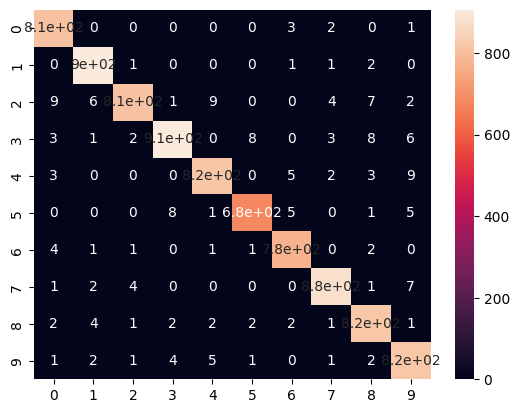

In [18]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(np.round(pred), axis=1)), annot=True);

In [19]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(np.round(pred), axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.99      0.96      0.97       846
           3       0.98      0.97      0.98       937
           4       0.98      0.97      0.98       839
           5       0.98      0.97      0.98       702
           6       0.98      0.99      0.98       785
           7       0.98      0.98      0.98       893
           8       0.97      0.98      0.97       835
           9       0.96      0.98      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


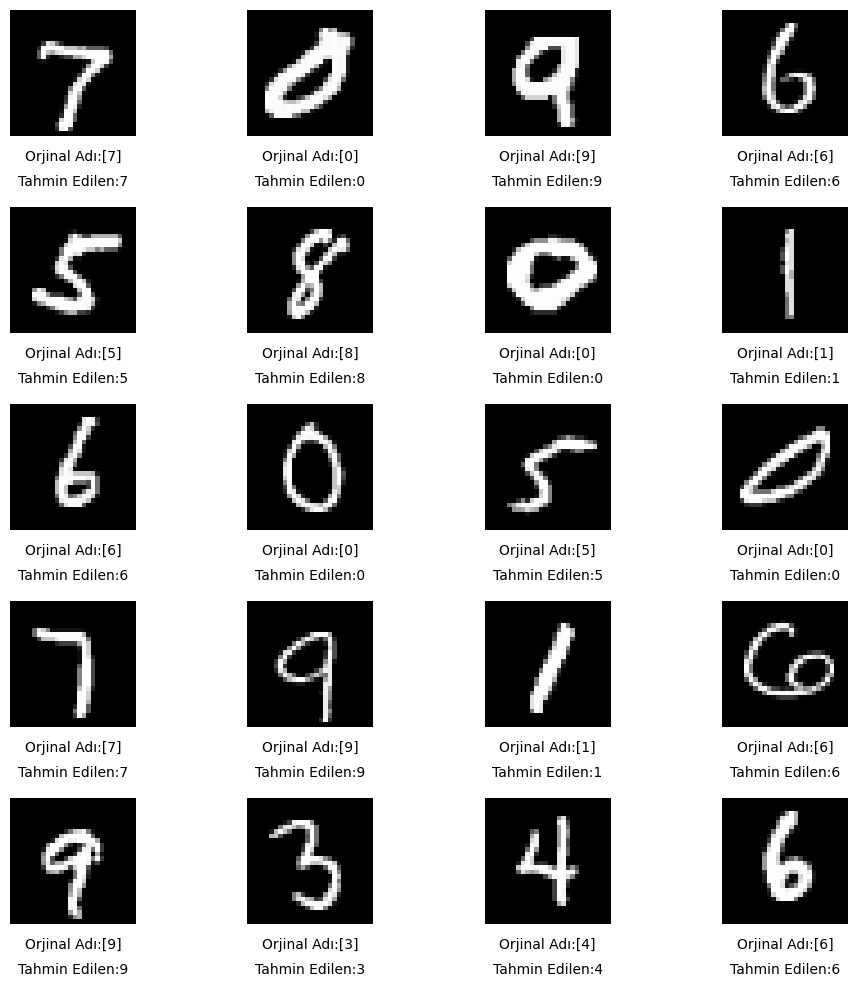

In [20]:
selected_images = df.sample(20)
selected_images = selected_images.reset_index(drop=True)

def tahmin(x):
    x=np.array([x])
    x=x/255.0
    pred=model.predict(x)
    pred=np.round(np.argmax(pred, axis=1))[0]
    return pred

fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.axis("off")
    t=tahmin(selected_images.iloc[i, 1:])
    ax.text(0.5, -0.2, "Orjinal Adı:"+str(selected_images.iloc[i, :1].values), transform=ax.transAxes, ha='center')
    ax.text(0.5, -0.4, "Tahmin Edilen:"+str(t), transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()

In [21]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
history = model.fit(x, y, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0387
Epoch 2/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0121
Epoch 3/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9981 - loss: 0.0064
Epoch 4/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9971 - loss: 0.0109
Epoch 5/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9976 - loss: 0.0071
Epoch 6/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9973 - loss: 0.0095
Epoch 7/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0084
Epoch 8/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9976 - loss: 0.0080
Epoch 9/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9976 - loss: 0.0083
Epoch 10/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9965 - loss: 0.0148
Epoch 11/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0047
Epoch 12/25
1313/1313 ━━━━━━━━

In [23]:
xt=test
xt = xt / 255.0

In [24]:
pred=np.argmax(model.predict(xt), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
test["Label"]=pred

In [27]:
test['ImageId'] = test.index + 1

In [28]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label,ImageId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [29]:
test[["ImageId", "Label"]].to_csv('submission.csv', index=False)

Bu yöntemle Kaggle'da 0.8605 skor elde edildi. Şimdi de CNN yöntemimi deneyelim.

## CNN ile Modelleme

In [30]:
x = np.array(df.drop("label", axis=1))
x = np.array(x).reshape(42000, 28, 28, 1)
x = x / 255.0
x.shape

(42000, 28, 28, 1)

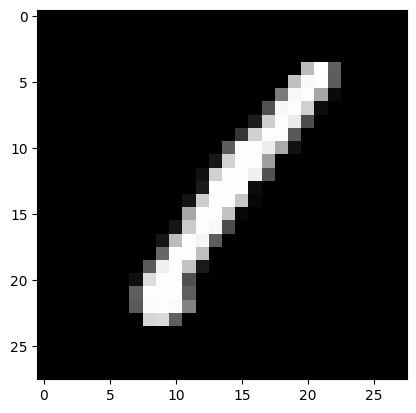

In [31]:
plt.imshow(x[0], cmap="gray")

In [32]:
y = np.array(df["label"])
x.shape, y.shape

((42000, 28, 28, 1), (42000,))

In [33]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [34]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
history=model.fit(x, y, batch_size=32, epochs=25, validation_split=0.2)
#history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=25, verbose=1)

Epoch 1/25


2024-05-09 17:43:09.180698: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-05-09 17:43:09.180759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-05-09 17:43:09.180769: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-05-09 17:43:09.180783: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-05-09 17:43:09.180791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-05-09 17:43:09.180799: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-05-09 17:43:09.180807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-05-09 17:43:09.180814: E external/local_xla/xla/se

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.4569

2024-05-09 17:43:16.399355: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-05-09 17:43:16.399419: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-05-09 17:43:16.399429: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-05-09 17:43:16.399436: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-05-09 17:43:16.399444: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-05-09 17:43:16.399452: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-05-09 17:43:16.399459: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-05-09 17:43:16.399467: E external/local_xla/xla/ser

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8674 - loss: 0.4563 - val_accuracy: 0.9648 - val_loss: 0.1148
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9677 - loss: 0.1066 - val_accuracy: 0.9768 - val_loss: 0.0821
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9771 - loss: 0.0730 - val_accuracy: 0.9837 - val_loss: 0.0554
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9806 - loss: 0.0609 - val_accuracy: 0.9862 - val_loss: 0.0446
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9815 - val_loss: 0.0581
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9863 - loss: 0.0415 - val_accuracy: 0.9849 - val_loss: 0.0520
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9869 - val_loss: 0.0476
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0273 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


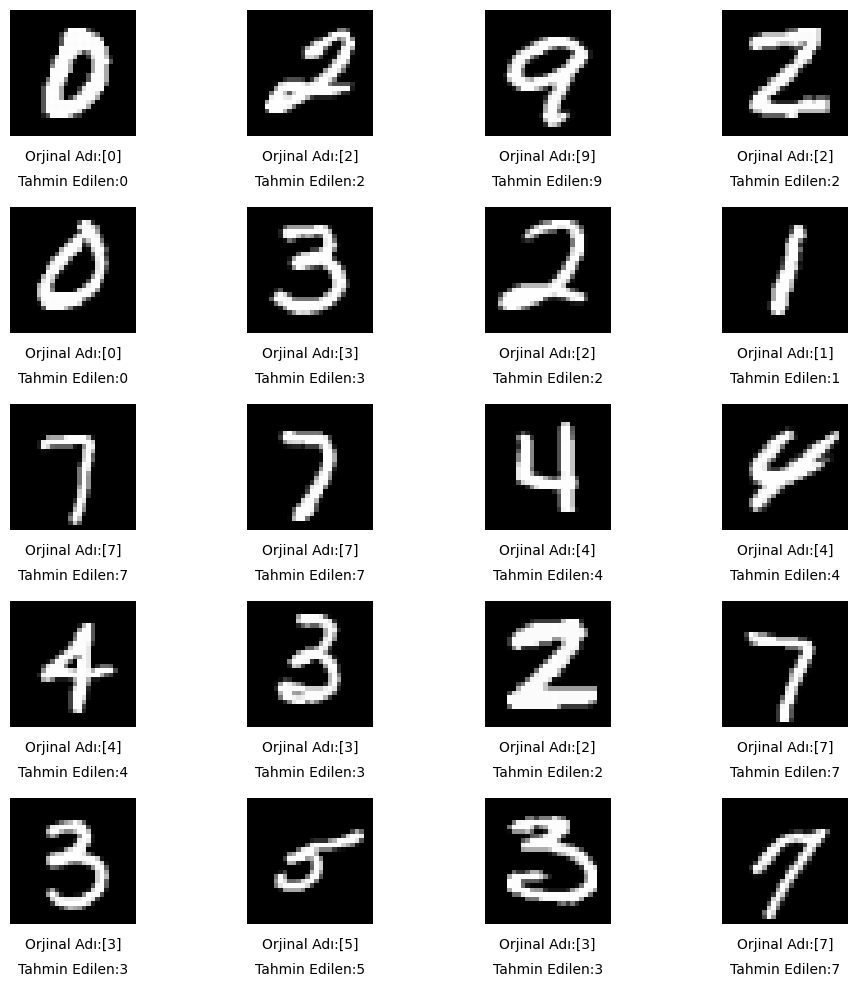

In [37]:
selected_images = df.sample(20)
selected_images = selected_images.reset_index(drop=True)

def tahmin(x):
    x = np.array(x).reshape(1, 28, 28, 1)
    x=x/255.0
    pred=model.predict(x)
    pred=np.round(np.argmax(pred, axis=1))[0]
    return pred

fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.axis("off")
    t=tahmin(selected_images.iloc[i, 1:])
    ax.text(0.5, -0.2, "Orjinal Adı:"+str(selected_images.iloc[i, :1].values), transform=ax.transAxes, ha='center')
    ax.text(0.5, -0.4, "Tahmin Edilen:"+str(t), transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()

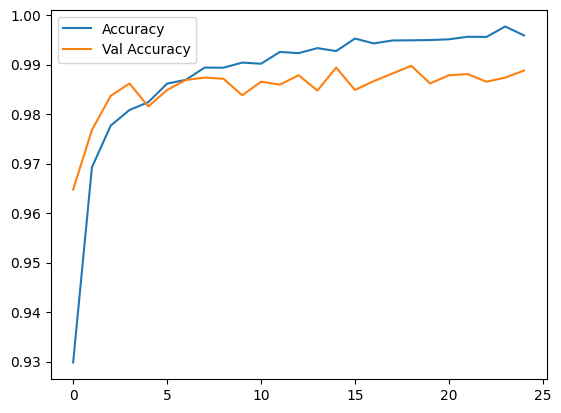

In [38]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [39]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
xt = test
xt.shape

(28000, 784)

In [40]:
xt = np.array(xt).reshape(28000, 28, 28, 1)
xt = xt / 255.0
xt.shape

(28000, 28, 28, 1)

In [41]:
pred=np.argmax(model.predict(xt), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [42]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [43]:
test["Label"]=pred
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [44]:
test['ImageId'] = test.index + 1

In [45]:
test[["ImageId", "Label"]].to_csv('submission.csv', index=False)

### Bu son yaptığımız modelleme ile Kaggle yarışmasında 0.98682 skor elde edildi.

Modeli kaydedip streamlit uygulamasına dönüştürelim.

In [46]:
model.save("digit_model.keras")